In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('Salon_Data.csv')
print(f'Shape : {df.shape}')

Shape : (72, 8)


In [42]:
df.head(5)

,date,time,haircut,price,hair_stylist,gender,type,rating
0,2021-07-01,morning,hair,150,Asim,Male,regular,4.0
1,2021-07-01,morning,hair,250,Viraj,Female,new,4.7
2,2021-07-01,noon,beard,100,Atif,Male,regular,4.2
3,2021-07-01,noon,hair,150,Asim,Male,new,3.7
4,2021-07-01,noon,all,350,Viraj,Male,regular,4.8


# Pie Chart

pie chart of gender and type

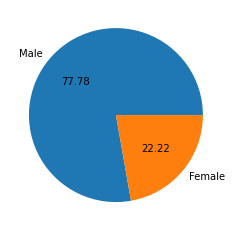

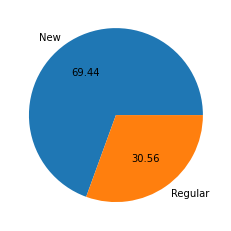

In [5]:
plt.pie(x=df.gender.value_counts(), labels=['Male','Female'], autopct='%.2f')
plt.show()
plt.pie(x=df['type'].value_counts(), labels=['New','Regular'], autopct='%.2f')
plt.show()

pie chart of % of haircut given by hairstylist

Atif     29
Asim     23
Viraj    20
Name: hair_stylist, dtype: int64


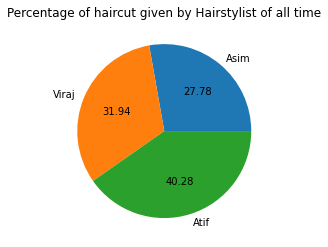

In [45]:
print(df.hair_stylist.value_counts())
plt.pie(df.hair_stylist.value_counts().sort_values(), 
        labels=df.hair_stylist.unique(), autopct='%.2f')
plt.title('Percentage of haircut given by Hairstylist of all time')
plt.show()

# Bar Graph

bar graph of haircut type

<AxesSubplot:>

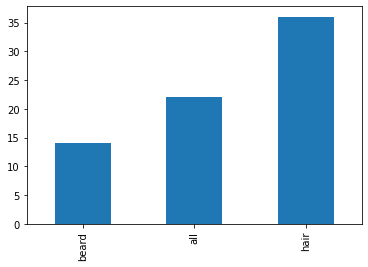

In [62]:
df.haircut.value_counts().sort_values().plot(kind = 'bar')

bar graph of haircut counts

morning     18
mid noon    20
noon        34
Name: time, dtype: int64


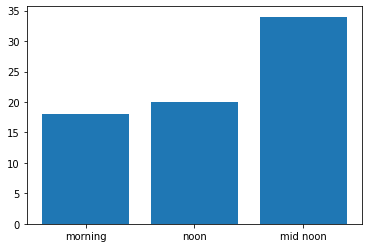

In [63]:
print(df.time.value_counts().sort_values())
plt.bar(df.time.unique(), df.time.value_counts().sort_values())
plt.show()

Multiple bar graphs of Individual Hairstylist

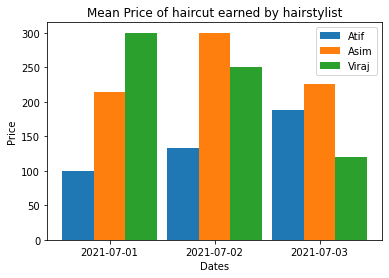

In [55]:
hair_stylist = df.hair_stylist.unique()
days = df.date.unique()
foo = lambda name, date: df[(df['hair_stylist'] == name)
                            & (df['date'] == date)]['price']
atif = [foo('Atif', date).mean() for date in days]
asim = [foo('Asim', date).mean() for date in days]
viraj = [foo('Viraj', date).mean() for date in days]
x = np.arange(len(days))
plt.bar(x-0.3, atif,0.3, label='Atif')
plt.bar(x+0, asim,0.3, label='Asim')
plt.bar(x+0.3, viraj,0.3, label='Viraj')
plt.xticks(x, days)
plt.xlabel('Dates')
plt.ylabel('Price')
plt.title('Mean Price of haircut earned by hairstylist')
plt.legend()
plt.show()

# Line Plot

line plot of all time


noon        34
mid noon    20
morning     18
Name: time, dtype: int64


Text(0, 0.5, 'No. of haircuts')

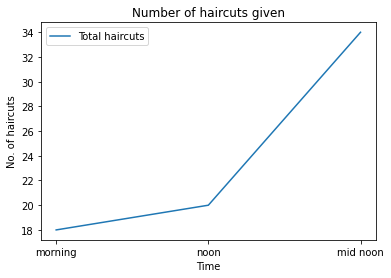

In [46]:
plt.plot(df.time.unique(), df.time.value_counts().sort_values(),
         label='Total haircuts')
print(df.time.value_counts())
plt.title('Number of haircuts given')
plt.xlabel('Time')
plt.legend()
plt.ylabel('No. of haircuts')

Line plot of particular date

Date Based wages

mid noon     4
morning      6
noon        11
Name: time, dtype: int64


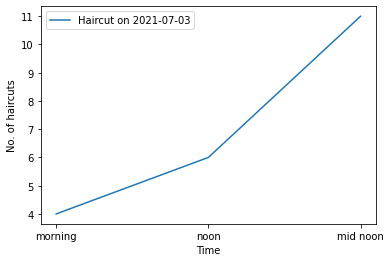

In [48]:
day = '2021-07-03'
day_func = lambda day: df[df['date']==day]['time'].value_counts().sort_values()
print(day_func(day))
plt.plot(df.time.unique(), day_func(day), label=f'Haircut on {day}')
plt.xlabel('Time')
plt.ylabel('No. of haircuts')
plt.legend()
plt.show()

# Box Plot

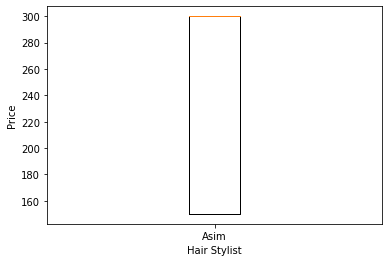

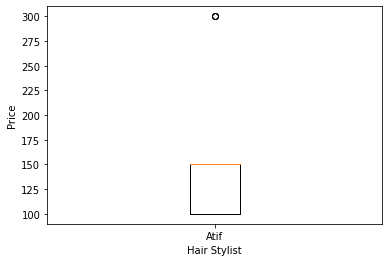

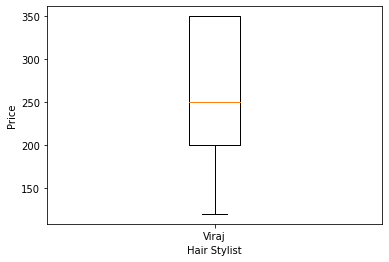

In [49]:
hair_stylist = lambda name: df[df['hair_stylist']==name]['price']
for name in ['Asim','Atif','Viraj']:
    plt.boxplot(hair_stylist(name), labels=[name])
    plt.xlabel('Hair Stylist')
    plt.ylabel('Price')
    plt.show()

# Scatter Plot

Scatter Plot of Rating of All Hair-Stylists

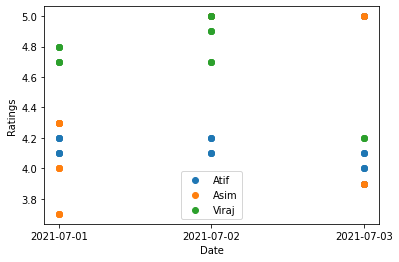

In [60]:
v,at = df[df['hair_stylist']=='Viraj'],df[df['hair_stylist']=='Atif']
a = df[df['hair_stylist']=='Asim']
plt.scatter(at['date'], at['rating'], label='Atif')
plt.scatter(a['date'], a['rating'], label='Asim')
plt.scatter(v['date'], v['rating'], label='Viraj')
plt.xlabel('Date')
plt.ylabel('Ratings')
plt.legend(loc='best')
plt.show()